In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
# drop Loan_ID column
df.drop('Loan_ID',axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [25]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
# drop null values
df.dropna(axis=0,inplace=True)

In [27]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### draw count plot to check common gender, married status, education, self employed and Property_Area

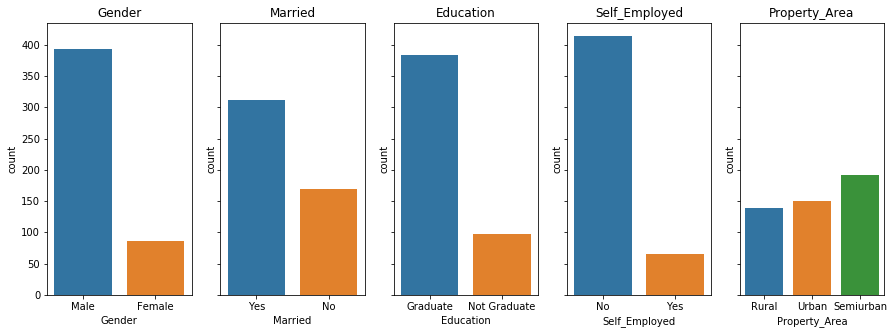

In [29]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('')

# Gender
sns.countplot(df['Gender'],ax=axes[0])
axes[0].set_title('Gender')
# Married
sns.countplot(df['Married'],ax=axes[1])
axes[1].set_title('Married')
# Education
sns.countplot(df['Education'],ax=axes[2])
axes[2].set_title('Education')

# Self_Employed
sns.countplot(df['Self_Employed'],ax=axes[3])
axes[3].set_title('Self_Employed')

# Property_Area
sns.countplot(df['Property_Area'],ax=axes[4])
axes[4].set_title('Property_Area');

check common gender in all property area

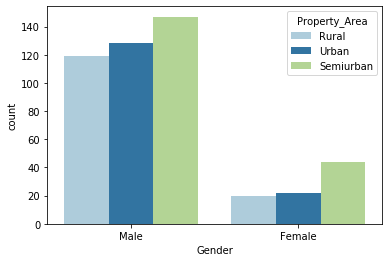

In [37]:
sns.countplot(x=df['Gender'], hue=df['Property_Area'], palette='Paired');

### convert Yes to 1 and No to 0

In [ ]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})

### dummy all areas to columns to check if there's bias to specific area or not

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Property_Area'],prefix='Area')],axis=1)
df.drop(['Property_Area'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban
1,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1


In [ ]:
# reindex the columns
column_names = ['Gender',	'Married',	'Dependents', 'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term',	'Credit_History', 'Area_Rural',	'Area_Semiurban', 'Area_Urban', 'Loan_Status']

df = df.reindex(columns=column_names)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Area_Rural,Area_Semiurban,Area_Urban,Loan_Status
1,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0,0
2,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,0,1,1
3,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,0,1,1
4,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,0,1,1
5,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,0,1,1


### number of all Female and Male that Loan status accepted

In [ ]:
# Female
df[df['Gender'] == 'Female'].groupby('Gender').sum().get('Loan_Status')

Gender
Female    54
Name: Loan_Status, dtype: int64

In [ ]:
# Male
df[df['Gender'] == 'Male'].groupby('Gender').sum().get('Loan_Status')

Gender
Male    278
Name: Loan_Status, dtype: int64

making visualisation for same question

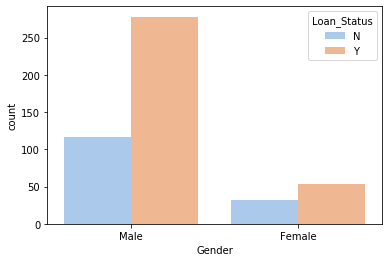

In [45]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'], palette='pastel');

### check correlation between Loan status and all features

In [ ]:
round(df[df.columns].corr()['Loan_Status'],5)

Married              0.11232
Education            0.06844
Self_Employed       -0.03471
ApplicantIncome     -0.04315
CoapplicantIncome   -0.04902
LoanAmount          -0.07175
Loan_Amount_Term    -0.00780
Credit_History       0.52939
Area_Rural          -0.11082
Area_Semiurban       0.15569
Area_Urban          -0.05596
Loan_Status          1.00000
Name: Loan_Status, dtype: float64

there's a relation between Credit History and Loan Status

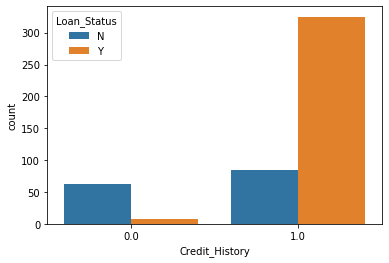

In [41]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status']);

we find that if you have a credit history you will have a high prob to be accepted

### check number of all accepted loan with loan term

In [ ]:
df.groupby('Loan_Amount_Term').sum().get('Loan_Status')

Loan_Amount_Term
36.0       0
60.0       2
84.0       2
120.0      3
180.0     24
240.0      1
300.0      4
360.0    292
480.0      4
Name: Loan_Status, dtype: int64

### check if you haven't a co application income and haven't an education effective in loan or not

In [ ]:
df[(df['CoapplicantIncome'] == 0) & (df['Education'] == 0)].sum().get('Loan_Status') / len(df[(df['CoapplicantIncome'] == 0) & (df['Education'] == 0)])

0.6052631578947368

There is no relation